#### Import neccesary libraries

In [104]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

#

## # Data Collection

In [105]:
# Load the dataset
file_path = r'dataset\Final_dataset.csv'
df = pd.read_csv(file_path)

#### Analys the data

In [106]:
# Count rows and columns
df.shape

(2507, 11)

In [107]:
# columns names
df.columns

Index(['Response Time', 'Availability', 'Throughput', 'Successability',
       'Reliability', 'Compliance', 'Best Practices', 'Latency',
       'Documentation', 'Service Name', 'Service Classification'],
      dtype='object')

#### Dataset Description

1. **`Response Time`**  :   The time it takes for the web service to respond to a request, usually measured in milliseconds. 
It’s a critical performance metric indicating how quickly the service processes and returns a response.

2. **`Availability`**   :   This represents the percentage of time the service is available and operational compared to the total time. High availability means the service is down less often, which generally indicates better quality.

3. **`Throughput`**     :   The number of requests or transactions that the web service can handle in a given period (e.g., requests per second). Higher throughput indicates that the service can handle more load, which is a sign of good performance and scalability.

4. **`Successability`** :   This likely refers to the success rate of the service’s responses. It’s often measured as the percentage of successful requests compared to total requests, with a higher success rate indicating better reliability.

5. **`Reliability`**    :   This measures how consistently the web service performs as expected over time. It can encompass various factors like uptime, error rates, and service stability. A reliable service is consistently available and performs its intended function without frequent failures.

6. **`Compliance`**     :   This refers to how well the web service adheres to specified standards, regulations, or guidelines. It could involve industry standards, security requirements, or best practices. High compliance means the service meets required standards or regulations.

7. **`Best Practices`** :   This column might evaluate whether the service follows recommended practices or guidelines for development and operation. Adhering to best practices often leads to better performance, security, and maintainability.

8. **`Latency`**        :   The time delay between the sending of a request and the receipt of a response. While similar to response time, latency specifically focuses on the delay in data transmission and processing. Lower latency is preferable as it signifies faster communication.

9. **`Documentation`**  :    This refers to the quality and completeness of the service’s documentation. Good documentation helps users understand how to integrate and use the service effectively, which can be a factor in overall service quality.

10. **`Service Name`**  :    The name of the web service. This is mainly an identifier and doesn’t usually impact the service quality but is useful for reference and categorization.

11. **`Service Classification`**  :  This is our Target column. It gives four categories. 1. Bronze, 2. Gold, 3. Platinum, 4. Silver 


In [108]:
# Read first 5 rows
df.head()

Response Time  Availability  Throughput  Successability  Reliability  \
0          202.0            98         9.7              99           80   
1          337.0            93         4.7              98           67   
2          629.0            92         2.1              97           50   
3          339.0            87        11.7              95           67   
4          275.0            88         4.0              96           50   

   Compliance  Best Practices  Latency  Documentation            Service Name  \
0          78              87     43.0             94  ScheduleFileWebService   
1          78              72     27.0              1             RsvmService   
2          78              66     15.0              1    backtranambigService   
3          78              72     48.0              3            Personalizer   
4          78              66     20.0              8    GetTradingConditions   

  Service Classification  
0                 Silver  
1                   Gold  
2               Platinum  
3                   Gold  
4                   Gold

In [109]:
# Read last 5 rows
df.tail()

Response Time  Availability  Throughput  Successability  Reliability  \
2502        2938.50            72         2.9              72           73   
2503         286.00            93         9.4              98           73   
2504         137.00            86         8.6              86           73   
2505         210.33            93         2.3              98           67   
2506         348.10            67         2.3              68           73   

      Compliance  Best Practices  Latency  Documentation  \
2502          78              84   344.50             38   
2503          78              84    16.00             87   
2504          78              84     2.00              8   
2505          67              72    46.33              9   
2506          89              80    74.40             94   

                               Service Name Service Classification  
2502                                getJoke               Platinum  
2503  MorphologicalAnalysis_frontendService                   Gold  
2504                  EmailAddressValidator                 Bronze  
2505                                  Batch                 Silver  
2506                       prettyseqService                   Gold

In [110]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Response Time           2507 non-null   float64
 1   Availability            2507 non-null   int64  
 2   Throughput              2507 non-null   float64
 3   Successability          2507 non-null   int64  
 4   Reliability             2507 non-null   int64  
 5   Compliance              2507 non-null   int64  
 6   Best Practices          2507 non-null   int64  
 7   Latency                 2507 non-null   float64
 8   Documentation           2507 non-null   int64  
 9   Service Name            2507 non-null   object 
 10  Service Classification  2507 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 215.6+ KB


In [111]:
# Information about the dataset
df.describe()

Response Time  Availability   Throughput  Successability  Reliability  \
count    2507.000000   2507.000000  2507.000000     2507.000000  2507.000000   
mean      383.834025     81.145592     9.035540       83.887116    69.783406   
std       564.361546     18.701267     7.730799       19.902647     8.575271   
min        37.000000      7.000000     0.100000        8.000000    33.000000   
25%       142.335000     75.000000     2.800000       76.000000    67.000000   
50%       226.600000     87.000000     6.900000       95.000000    73.000000   
75%       348.665000     93.000000    13.300000       98.000000    73.000000   
max      4989.670000    100.000000    43.100000      100.000000    89.000000   

        Compliance  Best Practices      Latency  Documentation  
count  2507.000000     2507.000000  2507.000000    2507.000000  
mean     88.433586       79.307539    54.667004      31.320303  
std      10.026575        7.816835   191.709030      31.509406  
min      33.000000       50.000000     0.250000       1.000000  
25%      78.000000       75.000000     4.600000       6.000000  
50%      89.000000       82.000000    11.860000      11.000000  
75%     100.000000       84.000000    44.680000      42.000000  
max     100.000000       95.000000  4140.350000      97.000000

In [112]:
# Find duplicate rows
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Response Time, Availability, Throughput, Successability, Reliability, Compliance, Best Practices, Latency, Documentation, Service Name, Service Classification]
Index: []


In [113]:
# Calculate empty values for all columns
df.isnull().sum()

Response Time             0
Availability              0
Throughput                0
Successability            0
Reliability               0
Compliance                0
Best Practices            0
Latency                   0
Documentation             0
Service Name              0
Service Classification    0
dtype: int64

In this dataset;
* we have 2507 rows and 11 columns. 

* Columns => Response Time, Availability, Throughput, Successability, Reliability, Compliance, Best Practices, Latency,     Documentation, Service Name, Service Classification

* Data types:
    - Int (6):  Availability, Successability, Reliability, Compliance, Best Practices, Documentation
    - Float (3): Response Time, Throughput, Latency
    - Object (2): Service Name, Service Classification

* No duplicate values and No null values

* Service Name, Service Classification - For these object columns we need to implement label encoding.

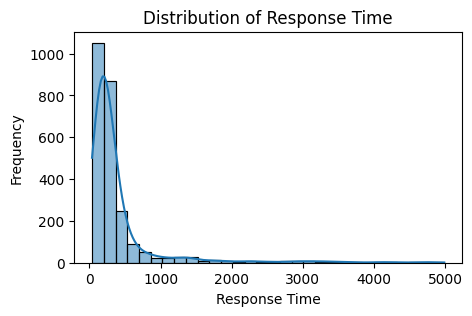

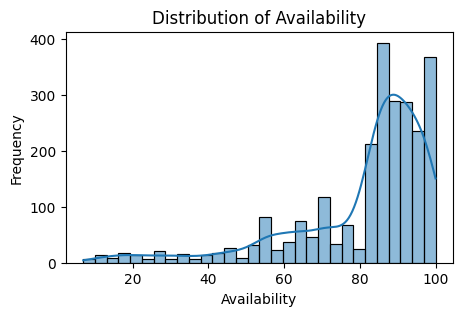

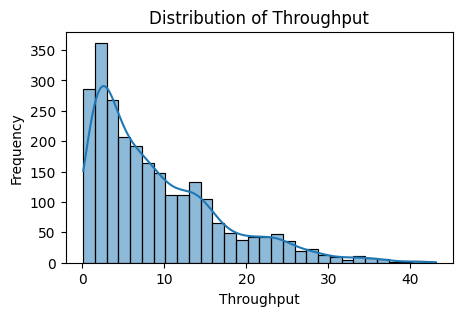

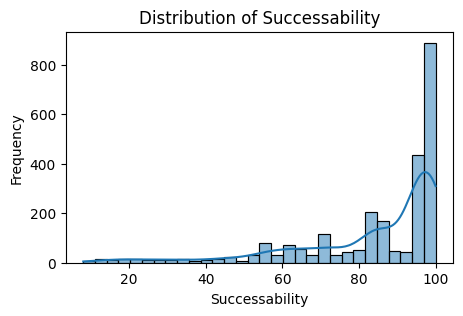

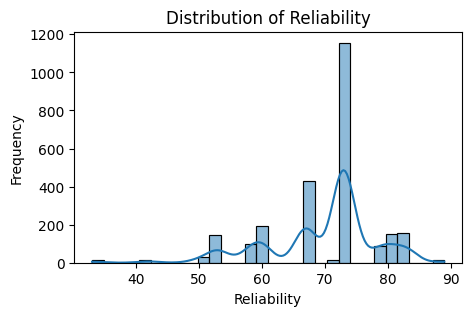

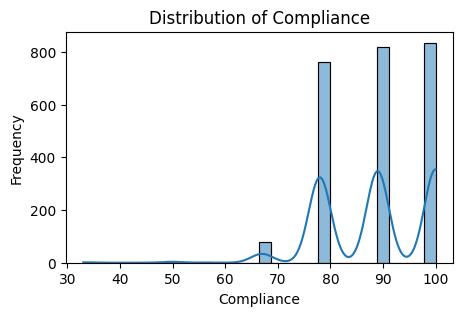

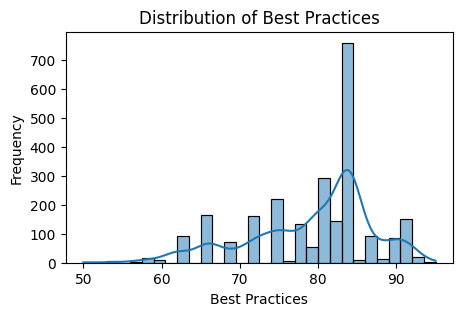

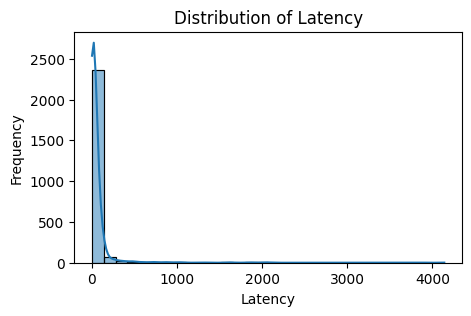

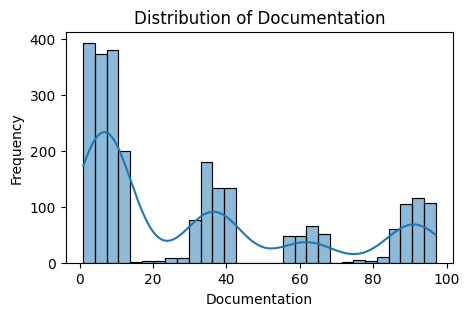

In [114]:
# Distribution plots for numerical features
numerical_features = ['Response Time', 'Availability', 'Throughput', 'Successability', 'Reliability', 'Compliance', 'Best Practices', 'Latency', 'Documentation']
for feature in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

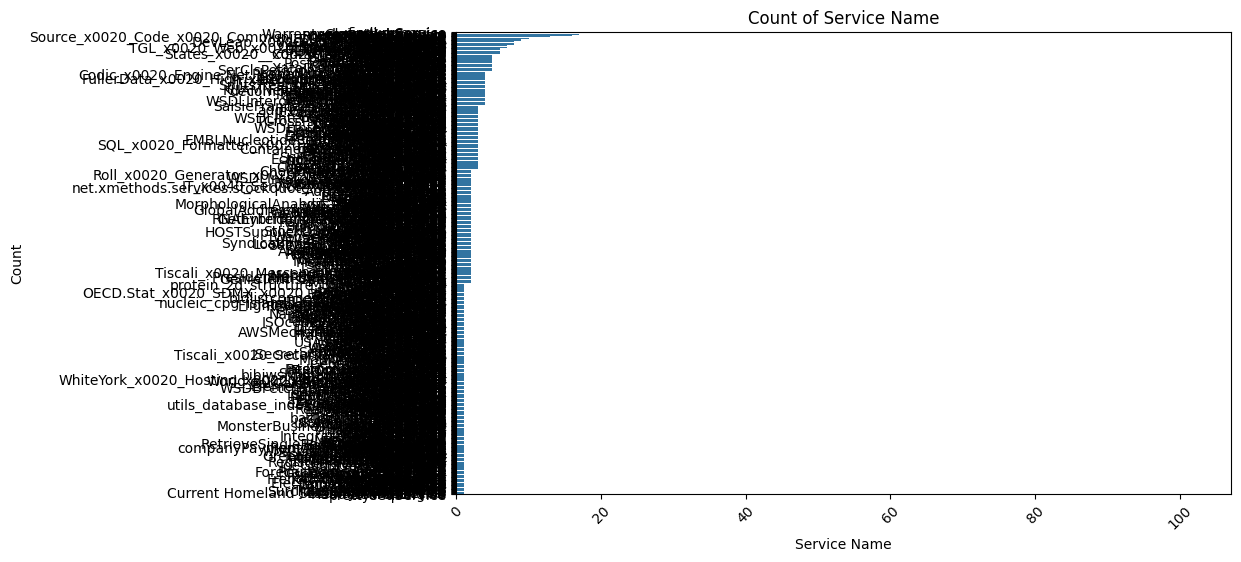

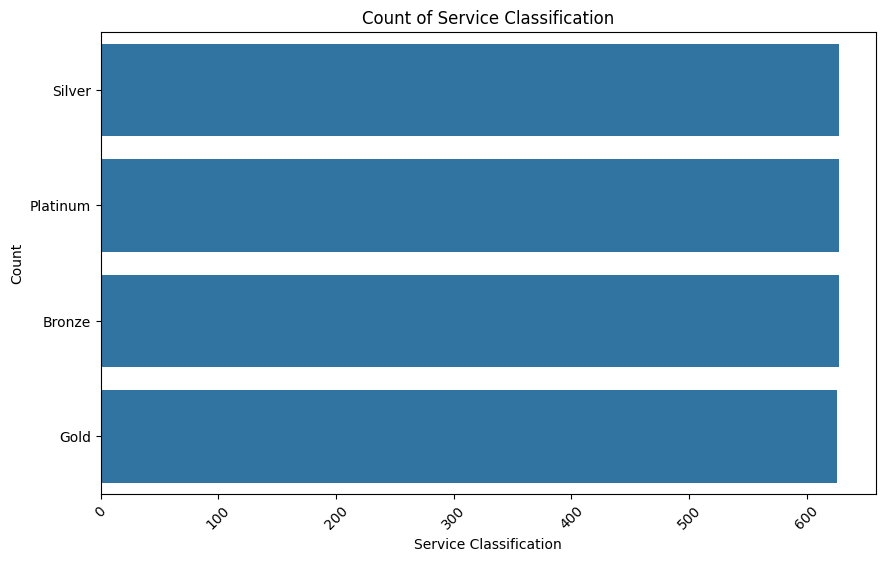

In [115]:
# Bar plots for categorical features
categorical_features = ['Service Name', 'Service Classification']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(df[feature], order = df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# # Data Preprocess

In [116]:
# dataframe
df

Response Time  Availability  Throughput  Successability  Reliability  \
0            202.00            98         9.7              99           80   
1            337.00            93         4.7              98           67   
2            629.00            92         2.1              97           50   
3            339.00            87        11.7              95           67   
4            275.00            88         4.0              96           50   
...             ...           ...         ...             ...          ...   
2502        2938.50            72         2.9              72           73   
2503         286.00            93         9.4              98           73   
2504         137.00            86         8.6              86           73   
2505         210.33            93         2.3              98           67   
2506         348.10            67         2.3              68           73   

      Compliance  Best Practices  Latency  Documentation  \
0             78              87    43.00             94   
1             78              72    27.00              1   
2             78              66    15.00              1   
3             78              72    48.00              3   
4             78              66    20.00              8   
...          ...             ...      ...            ...   
2502          78              84   344.50             38   
2503          78              84    16.00             87   
2504          78              84     2.00              8   
2505          67              72    46.33              9   
2506          89              80    74.40             94   

                               Service Name Service Classification  
0                    ScheduleFileWebService                 Silver  
1                               RsvmService                   Gold  
2                      backtranambigService               Platinum  
3                              Personalizer                   Gold  
4                      GetTradingConditions                   Gold  
...                                     ...                    ...  
2502                                getJoke               Platinum  
2503  MorphologicalAnalysis_frontendService                   Gold  
2504                  EmailAddressValidator                 Bronze  
2505                                  Batch                 Silver  
2506                       prettyseqService                   Gold  

[2507 rows x 11 columns]

In [117]:
#label encoding the object columns.
# Store object column names
original_columns = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")
    print("=====================")

Mapping for column 'Service Name':
Label 0: AAIService
Label 1: ABRXMLPubSub
Label 2: ABRXMLSearch
Label 3: ACMEProducts
Label 4: ADQLTranslator
Label 5: AOSIFWSService
Label 6: ARSA
Label 7: ASPNLexer
Label 8: ASPNLogin
Label 9: ASPNNewsFeeds
Label 10: AWSAlexa
Label 11: AWSECommerceService
Label 12: AWSMechanicalTurkRequester
Label 13: AccelerationUnit
Label 14: AccountManagement
Label 15: AccountServices
Label 16: AddressBookService
Label 17: AddressFinder
Label 18: AddressLookup
Label 19: AddressManager
Label 20: AddressVerifier
Label 21: Admin
Label 22: Advanced
Label 23: AffiliateService
Label 24: Afstandsberegner
Label 25: AircraftData
Label 26: AirportDataService
Label 27: AirportDelayService
Label 28: AladinImageService
Label 29: AllegroWebApiService
Label 30: AmazonHistoricalPricing
Label 31: AmbitServiceService
Label 32: Api
Label 33: ApniUrdu
Label 34: AppointmentServices
Label 35: AreaService
Label 36: AreasAndVolumes
Label 37: ArticleArchive
Label 38: ArticlesSecure
Label

In [118]:
# dataframe
df

Response Time  Availability  Throughput  Successability  Reliability  \
0            202.00            98         9.7              99           80   
1            337.00            93         4.7              98           67   
2            629.00            92         2.1              97           50   
3            339.00            87        11.7              95           67   
4            275.00            88         4.0              96           50   
...             ...           ...         ...             ...          ...   
2502        2938.50            72         2.9              72           73   
2503         286.00            93         9.4              98           73   
2504         137.00            86         8.6              86           73   
2505         210.33            93         2.3              98           67   
2506         348.10            67         2.3              68           73   

      Compliance  Best Practices  Latency  Documentation  Service Name  \
0             78              87    43.00             94           556   
1             78              72    27.00              1           532   
2             78              66    15.00              1           783   
3             78              72    48.00              3           460   
4             78              66    20.00              8           262   
...          ...             ...      ...            ...           ...   
2502          78              84   344.50             38           874   
2503          78              84    16.00             87           402   
2504          78              84     2.00              8           193   
2505          67              72    46.33              9            52   
2506          89              80    74.40             94           936   

      Service Classification  
0                          3  
1                          1  
2                          2  
3                          1  
4                          1  
...                      ...  
2502                       2  
2503                       1  
2504                       0  
2505                       3  
2506                       1  

[2507 rows x 11 columns]

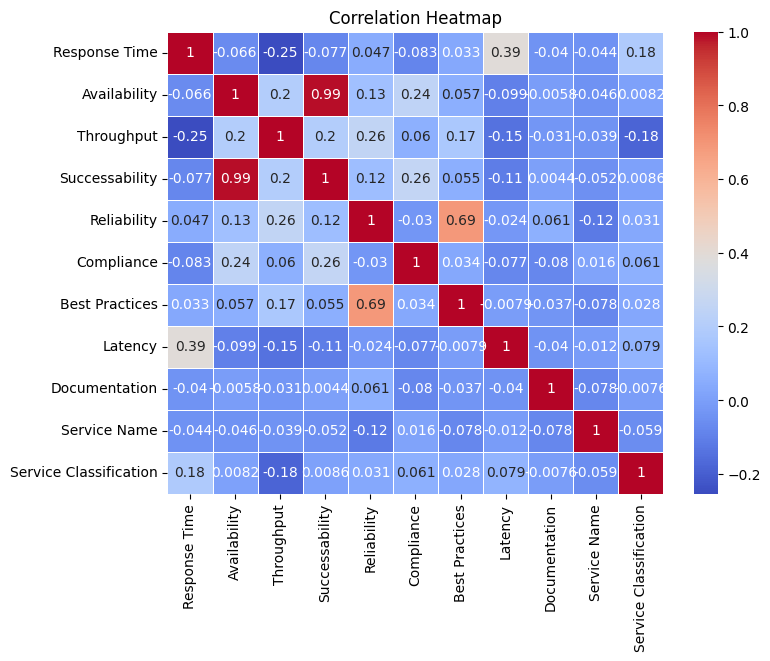

In [119]:
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## # Data Splitting

* Features    => 'Response Time', 'Availability', 'Throughput', 'Successability', 'Reliability', 'Compliance', 'Best Practices', 'Latency', 'Documentation', 'Service Name'
* Target      => Service Classification

In [120]:
# Features and target
X = df.drop('Service Classification', axis=1)
y = df['Service Classification']

In [121]:
# Features
X

Response Time  Availability  Throughput  Successability  Reliability  \
0            202.00            98         9.7              99           80   
1            337.00            93         4.7              98           67   
2            629.00            92         2.1              97           50   
3            339.00            87        11.7              95           67   
4            275.00            88         4.0              96           50   
...             ...           ...         ...             ...          ...   
2502        2938.50            72         2.9              72           73   
2503         286.00            93         9.4              98           73   
2504         137.00            86         8.6              86           73   
2505         210.33            93         2.3              98           67   
2506         348.10            67         2.3              68           73   

      Compliance  Best Practices  Latency  Documentation  Service Name  
0             78              87    43.00             94           556  
1             78              72    27.00              1           532  
2             78              66    15.00              1           783  
3             78              72    48.00              3           460  
4             78              66    20.00              8           262  
...          ...             ...      ...            ...           ...  
2502          78              84   344.50             38           874  
2503          78              84    16.00             87           402  
2504          78              84     2.00              8           193  
2505          67              72    46.33              9            52  
2506          89              80    74.40             94           936  

[2507 rows x 10 columns]

In [122]:
# target
y

0       3
1       1
2       2
3       1
4       1
       ..
2502    2
2503    1
2504    0
2505    3
2506    1
Name: Service Classification, Length: 2507, dtype: int32

In [123]:
# Split labeled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, y_train    => Training sets

X_test, y_test      => Testing sets

In [124]:
X_train

Response Time  Availability  Throughput  Successability  Reliability  \
2239          66.00            83        36.1              84           78   
358          306.00            90        12.6              96           73   
2257         170.67            96         2.6              99           73   
8            790.20            91         3.1              97           78   
1510         248.60            91         2.7              97           73   
...             ...           ...         ...             ...          ...   
1638         248.60            89         1.4              96           67   
1095         445.43            96         8.8              99           80   
1130         154.50           100        12.2             100           73   
1294         292.00            83        16.6              84           58   
860          101.33            63         4.0              64           73   

      Compliance  Best Practices  Latency  Documentation  Service Name  
2239          89              89     3.00             11           606  
358          100              84     7.00             35           254  
2257          89              84    34.00             90           798  
8             78              89     1.80              9           504  
1510         100              84    44.40             10           768  
...          ...             ...      ...            ...           ...  
1638         100              82    45.40              7           988  
1095          78              83     6.14             91            71  
1130         100              80     5.00              7           494  
1294          89              80     5.00              4           364  
860          100              80     2.66              7           827  

[1754 rows x 10 columns]

In [125]:
y_train

2239    0
358     1
2257    3
8       2
1510    1
       ..
1638    1
1095    2
1130    3
1294    1
860     0
Name: Service Classification, Length: 1754, dtype: int32

In [126]:
X_test

Response Time  Availability  Throughput  Successability  Reliability  \
2121          82.00            90        18.9              97           73   
56           319.20            89         3.9              96           58   
2479         184.50            90         9.4              97           60   
1292         789.00            84         2.5              84           67   
1599         443.40            95         1.6              98           67   
...             ...           ...         ...             ...          ...   
263          213.20            98         0.9             100           58   
1463         272.43            85         1.9              86           53   
2166        1035.00            71         8.4              72           73   
807          670.00            93        13.2              98           80   
415          191.20            96         1.5              99           73   

      Compliance  Best Practices  Latency  Documentation  Service Name  
2121          89              62     1.00              2           924  
56            89              69     1.40             59           114  
2479          78              69    33.62             88           227  
1292          78              72   608.00             58            95  
1599         100              82    40.80              6           695  
...          ...             ...      ...            ...           ...  
263          100              75     7.20             41           772  
1463          89              66    69.39              7           859  
2166          78              88     6.00             11           221  
807          100              89    16.00             10           357  
415          100              84     7.60             36           208  

[753 rows x 10 columns]

In [127]:
y_test

2121    0
56      1
2479    3
1292    2
1599    2
       ..
263     3
1463    1
2166    2
807     2
415     3
Name: Service Classification, Length: 753, dtype: int32

#

## # Algorithm Implementation

#### Decision Tree

Training Accuracy of Decision Tree: 1.00
Testing Accuracy of Decision Tree: 1.00
Accuracy of Decision Tree:  0.99734395750332
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       0.99      1.00      1.00       205
           2       1.00      1.00      1.00       176
           3       1.00      0.99      0.99       191

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753



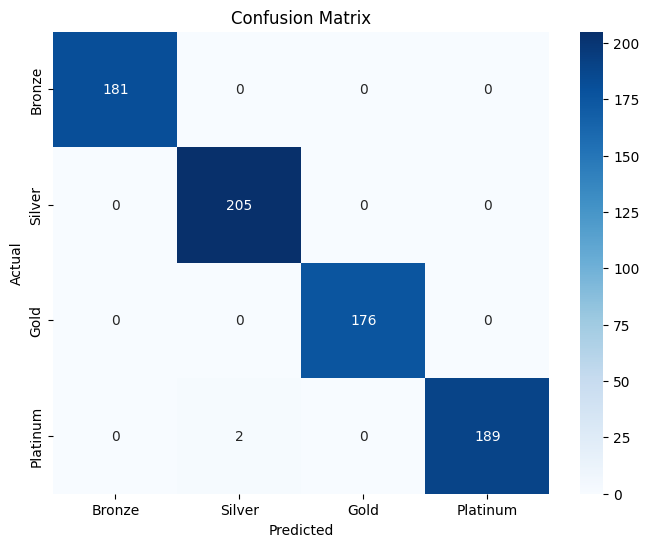

In [128]:
# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the dt on the training data
dt.fit(X_train, y_train)

# Predict on training data
y_train_pred_dt = dt.predict(X_train)

# Predict on testing data
y_test_pred_dt = dt.predict(X_test)

# Compute accuracy on training data
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
print(f"Training Accuracy of Decision Tree: {train_accuracy_dt:.2f}")

# Compute accuracy on testing data
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Testing Accuracy of Decision Tree: {test_accuracy_dt:.2f}")

accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
result = classification_report(y_test, y_test_pred_dt)

print("Accuracy of Decision Tree: ", accuracy_dt)
print(result)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'], yticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#

#### RandomForestClassifier

Training Accuracy of Random Forest: 1.00
Testing Accuracy of Random Forest: 1.00
Accuracy of Random Forest:  0.99734395750332
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       0.99      1.00      1.00       205
           2       1.00      1.00      1.00       176
           3       1.00      0.99      0.99       191

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753



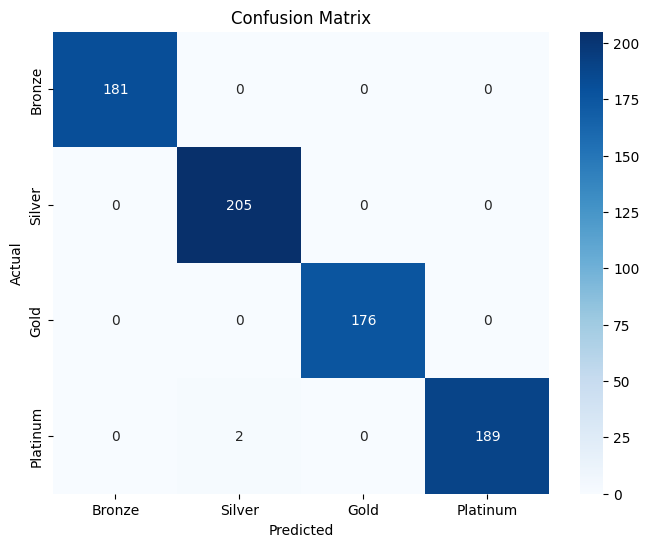

In [129]:
# Define the RandomForest Classifier
rf = RandomForestClassifier()

# Train the rf on the training data
rf.fit(X_train, y_train)

# Predict on training data
y_train_pred_rf = rf.predict(X_train)

# Predict on testing data
y_test_pred_rf = rf.predict(X_test)

# Compute accuracy on training data
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Training Accuracy of Random Forest: {train_accuracy_rf:.2f}")

# Compute accuracy on testing data
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Testing Accuracy of Random Forest: {test_accuracy_rf:.2f}")

accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
result = classification_report(y_test, y_test_pred_rf)

print("Accuracy of Random Forest: ", accuracy_rf)
print(result)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'], yticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#

#### MLPClassifier

Training Accuracy of MLP Classifier: 0.92
Testing Accuracy of MLP Classifier: 0.90
Accuracy of MLP Classifier:  0.899070385126162
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       181
           1       0.89      0.86      0.88       205
           2       0.96      0.94      0.95       176
           3       0.81      0.91      0.85       191

    accuracy                           0.90       753
   macro avg       0.91      0.90      0.90       753
weighted avg       0.90      0.90      0.90       753



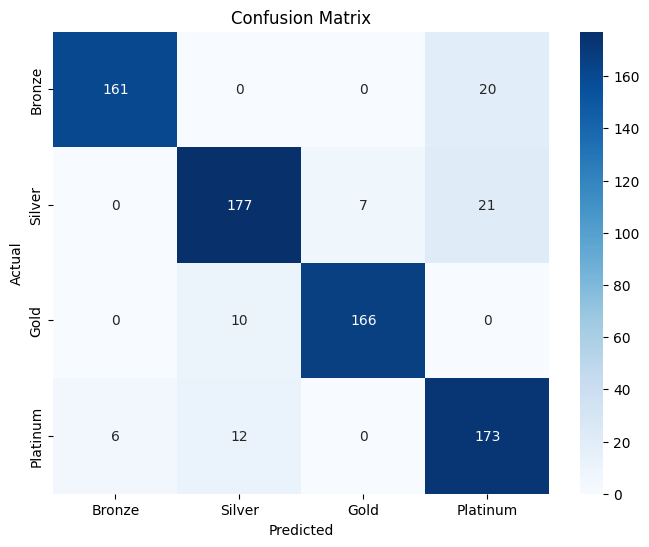

In [130]:
# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict on training data
y_train_pred_mlp = mlp.predict(X_train)

# Predict on testing data
y_test_pred_mlp = mlp.predict(X_test)

# Compute accuracy on training data
train_accuracy_mlp = accuracy_score(y_train, y_train_pred_mlp)
print(f"Training Accuracy of MLP Classifier: {train_accuracy_mlp:.2f}")

# Compute accuracy on testing data
test_accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)
print(f"Testing Accuracy of MLP Classifier: {test_accuracy_mlp:.2f}")

accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)
result = classification_report(y_test, y_test_pred_mlp)

print("Accuracy of MLP Classifier: ", accuracy_mlp)
print(result)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_mlp)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'], yticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#

#### XGBClassifier

Training Accuracy of XGB Classifier: 1.00
Testing Accuracy of XGB Classifier: 1.00
Accuracy of XGB Classifier:  0.99867197875166
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       205
           2       0.99      1.00      1.00       176
           3       1.00      1.00      1.00       191

    accuracy                           1.00       753
   macro avg       1.00      1.00      1.00       753
weighted avg       1.00      1.00      1.00       753



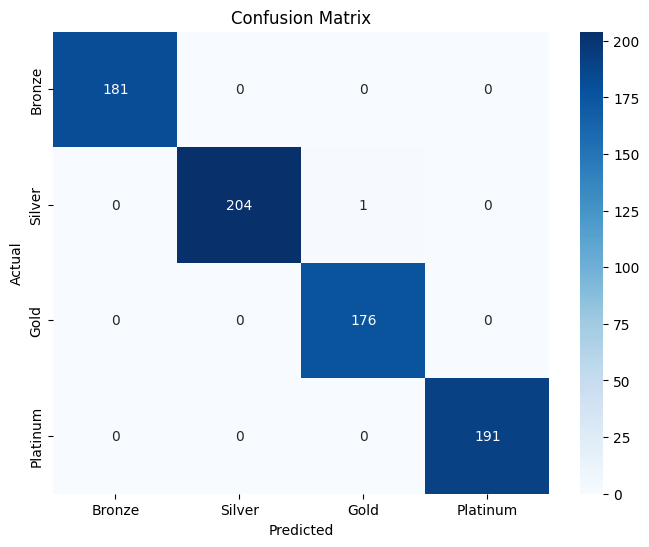

In [131]:
# Initialize the XGBClassifier
xgb = XGBClassifier()

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Predict on training data
y_train_pred_xgb = xgb.predict(X_train)

# Predict on testing data
y_test_pred_xgb = xgb.predict(X_test)

# Compute accuracy on training data
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
print(f"Training Accuracy of XGB Classifier: {train_accuracy_xgb:.2f}")

# Compute accuracy on testing data
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"Testing Accuracy of XGB Classifier: {test_accuracy_xgb:.2f}")

accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
result = classification_report(y_test, y_test_pred_xgb)

print("Accuracy of XGB Classifier: ", accuracy_xgb)
print(result)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'], yticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#

#### Support Vector Machine (SVM)

Training Accuracy of Support Vector Machine: 1.00
Testing Accuracy of Support Vector Machine: 0.99
Accuracy of Support Vector Machine:  0.9920318725099602
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       0.99      0.99      0.99       205
           2       0.98      0.99      0.99       176
           3       1.00      0.99      0.99       191

    accuracy                           0.99       753
   macro avg       0.99      0.99      0.99       753
weighted avg       0.99      0.99      0.99       753



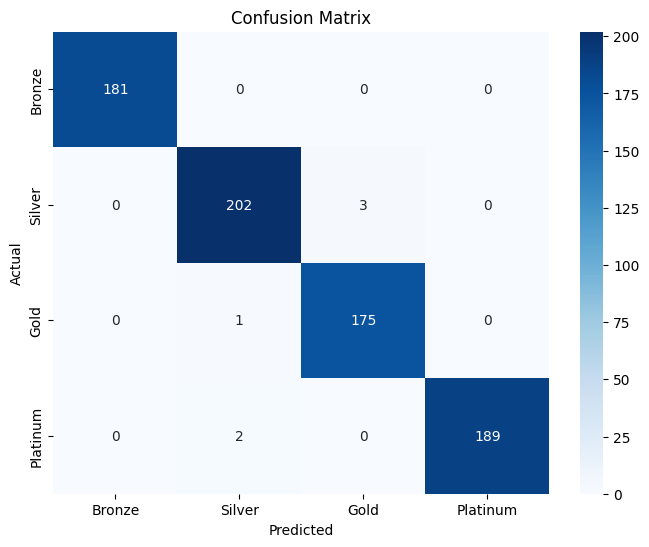

In [132]:
# Initialize the SVM classifier
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Predict on training data
y_train_pred_svm = svm.predict(X_train)

# Predict on testing data
y_test_pred_svm = svm.predict(X_test)

# Compute accuracy on training data
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
print(f"Training Accuracy of Support Vector Machine: {train_accuracy_svm:.2f}")

# Compute accuracy on testing data
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Testing Accuracy of Support Vector Machine: {test_accuracy_svm:.2f}")

accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
result = classification_report(y_test, y_test_pred_svm)

print("Accuracy of Support Vector Machine: ", accuracy_svm)
print(result)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'], yticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#

#### Logistic Regression

c:\Users\0877\.conda\envs\tk161562\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy of Logistic Regression: 0.91
Testing Accuracy of Logistic Regression: 0.91
Accuracy of Logistic Regression:  0.9083665338645418
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       181
           1       0.88      0.86      0.87       205
           2       0.95      0.95      0.95       176
           3       0.86      0.87      0.87       191

    accuracy                           0.91       753
   macro avg       0.91      0.91      0.91       753
weighted avg       0.91      0.91      0.91       753



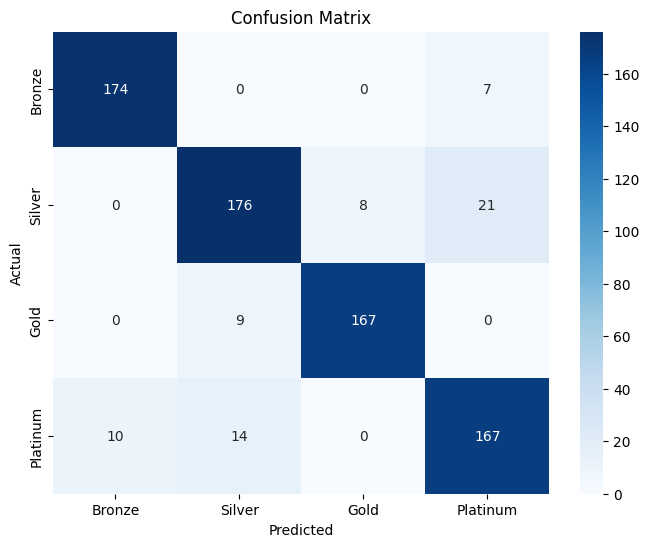

In [133]:
# Create logistic regression model
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on training data
y_train_pred_lr = lr.predict(X_train)

# Predict on testing data
y_test_pred_lr = lr.predict(X_test)

# Compute accuracy on training data
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
print(f"Training Accuracy of Logistic Regression: {train_accuracy_lr:.2f}")

# Compute accuracy on testing data
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print(f"Testing Accuracy of Logistic Regression: {test_accuracy_lr:.2f}")

accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
result = classification_report(y_test, y_test_pred_lr)

print("Accuracy of Logistic Regression: ", accuracy_lr)
print(result)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'], yticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#

#### KNeighborsClassifier

Training Accuracy of K Neighbors Classifier: 0.91
Testing Accuracy of K Neighbors Classifier: 0.91
Accuracy of K Neighbors Classifier:  0.9083665338645418
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       181
           1       0.88      0.86      0.87       205
           2       0.95      0.95      0.95       176
           3       0.86      0.87      0.87       191

    accuracy                           0.91       753
   macro avg       0.91      0.91      0.91       753
weighted avg       0.91      0.91      0.91       753



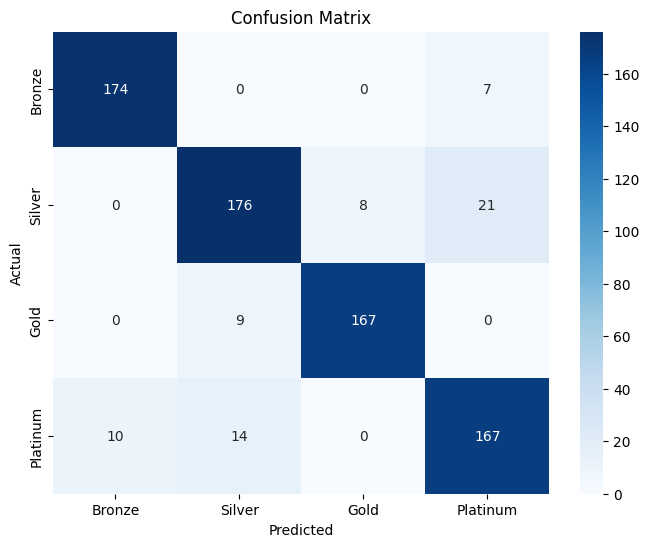

In [134]:
# Initialize the KNN model with the desired number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on training data
y_train_pred_knn = lr.predict(X_train)

# Predict on testing data
y_test_pred_knn = lr.predict(X_test)

# Compute accuracy on training data
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
print(f"Training Accuracy of K Neighbors Classifier: {train_accuracy_knn:.2f}")

# Compute accuracy on testing data
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"Testing Accuracy of K Neighbors Classifier: {test_accuracy_knn:.2f}")

accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
result = classification_report(y_test, y_test_pred_knn)

print("Accuracy of K Neighbors Classifier: ", accuracy_knn)
print(result)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'], yticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#

#### Gaussian Naive Bayes

Training Accuracy of Gaussian Naive Bayes: 0.91
Testing Accuracy of Gaussian Naive Bayes: 0.91
Accuracy of Gaussian Naive Bayes:  0.9083665338645418
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       181
           1       0.88      0.86      0.87       205
           2       0.95      0.95      0.95       176
           3       0.86      0.87      0.87       191

    accuracy                           0.91       753
   macro avg       0.91      0.91      0.91       753
weighted avg       0.91      0.91      0.91       753



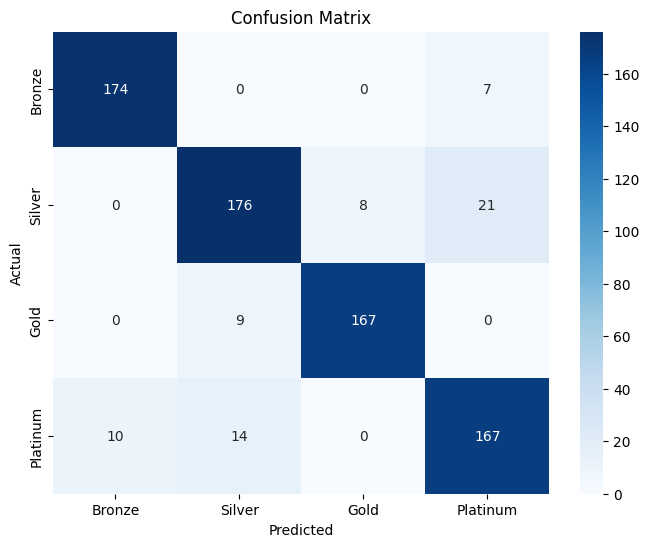

In [135]:
# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict on training data
y_train_pred_gnb = lr.predict(X_train)

# Predict on testing data
y_test_pred_gnb = lr.predict(X_test)

# Compute accuracy on training data
train_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)
print(f"Training Accuracy of Gaussian Naive Bayes: {train_accuracy_gnb:.2f}")

# Compute accuracy on testing data
test_accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)
print(f"Testing Accuracy of Gaussian Naive Bayes: {test_accuracy_gnb:.2f}")

accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)
result = classification_report(y_test, y_test_pred_gnb)

print("Accuracy of Gaussian Naive Bayes: ", accuracy_gnb)
print(result)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_gnb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'], yticklabels=['Bronze', 'Silver', 'Gold', 'Platinum'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#

#### Accuracy comparision Graph

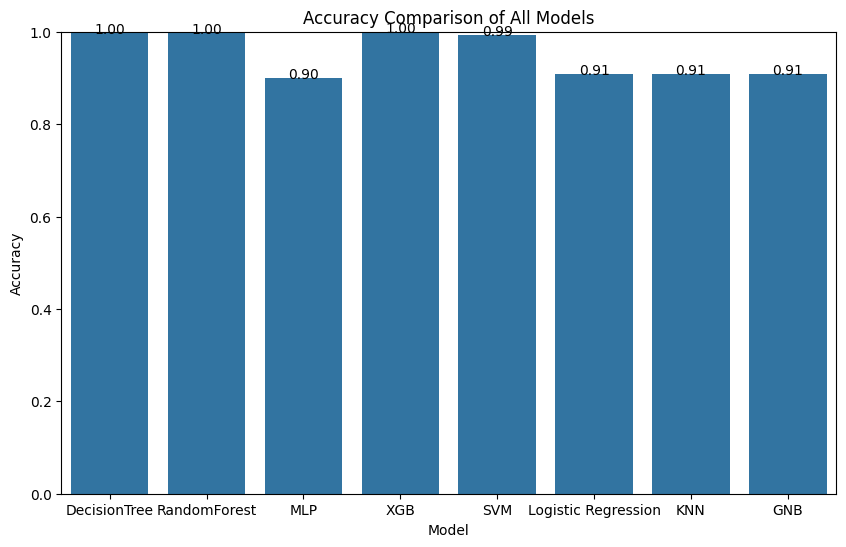

In [136]:
model_names = ['DecisionTree', 'RandomForest', 'MLP', 'XGB', 'SVM', 'Logistic Regression', 'KNN', 'GNB']
accuracies = [accuracy_dt, accuracy_rf, accuracy_mlp, accuracy_xgb, accuracy_svm, accuracy_lr, accuracy_knn, accuracy_gnb]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of All Models')
plt.ylim(0, 1)
for i in range(len(accuracies)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.2f}', ha='center')
plt.show()

#

#### # Save Model

In [137]:
# Save DecisionTree Classifier
joblib.dump(dt, 'models/DecisionTree.joblib')

# Save RandomForest Classifier
joblib.dump(rf, 'models/RandomForest.joblib')

# Save MLP Classifier 
joblib.dump(mlp, 'models/MLP.joblib')

# Save XGBClassifier 
joblib.dump(xgb, 'models/XGBClassifier.joblib')

# Save SVM model
joblib.dump(svm, 'models/SVM.joblib')

# Save Logistic Regression model
joblib.dump(lr, 'models/Logistic_Regression.joblib')

# Save DecisionTree Classifier
joblib.dump(knn, 'models/knn.joblib')

# Save Gaussian Naive Bayes model
joblib.dump(gnb, 'models/gnb.joblib')

['models/gnb.joblib']

#

### # Prediction Part with Explainable AI

In [ ]:
# importing lime
import lime
from lime import lime_tabular
import numpy as np
import pandas as pd

model = joblib.load(r'models\XGBClassifier.joblib')
prediction_dic = {
    0 : 'Bronze', 
    1 : 'Gold',
    2 : 'Platinum',
    3 : 'Silver' 
}


# creating an instance of the lime tabular explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
                                        training_data=np.array(X_train), 
                                        feature_names=X_train.columns, 
                                        class_names=['Bronze', 'Gold', 'Platinum', 'Silver'], 
                                        mode='classification')


def predict_func(input):
    result = model.predict([input])
    print("Predicted Class is : ", prediction_dic[result[0]])

    input_series = pd.Series(input, index=X_train.columns)

    # Create the explanation using LIME
    explanation = lime_explainer.explain_instance(data_row=input_series, predict_fn=model.predict_proba, top_labels=4, num_features=10)

    # Print out the explanation in the notebook
    explanation.show_in_notebook()

In [146]:
# Prediction for Bronze
Inputs = [82.00, 90, 18.9, 97, 73, 89, 62, 1.00, 2, 259]
predict_func(Inputs)

Predicted Class is :  Bronze


c:\Users\0877\.conda\envs\tk161562\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\0877\.conda\envs\tk161562\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\0877\.conda\envs\tk161562\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\0877\.conda\envs\tk161562\lib\site-packages\lime\lime_

In [147]:
# Prediction for Gold
Inputs = [319.20, 89, 3.9, 96, 58, 89, 69, 1.40, 59, 974]
predict_func(Inputs)

Predicted Class is :  Gold


c:\Users\0877\.conda\envs\tk161562\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\0877\.conda\envs\tk161562\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\0877\.conda\envs\tk161562\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\0877\.conda\envs\tk161562\lib\site-packages\lime\lime_

In [148]:
# Prediction for platinum
Inputs = [789.00, 84, 2.5, 84, 67, 78, 72, 608.00, 58, 778]
predict_func(Inputs)

Predicted Class is :  Platinum


c:\Users\0877\.conda\envs\tk161562\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\0877\.conda\envs\tk161562\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\0877\.conda\envs\tk161562\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\0877\.conda\envs\tk161562\lib\site-packages\lime\lime_

In [150]:
# Prediction for silver
Inputs = [184.50, 90, 9.4, 97, 60, 78, 69, 33.62, 88, 227]
predict_func(Inputs)

Predicted Class is :  Silver


c:\Users\0877\.conda\envs\tk161562\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\0877\.conda\envs\tk161562\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\0877\.conda\envs\tk161562\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\0877\.conda\envs\tk161562\lib\site-packages\lime\lime_

In [143]:
X_test

Response Time  Availability  Throughput  Successability  Reliability  \
2121          82.00            90        18.9              97           73   
56           319.20            89         3.9              96           58   
2479         184.50            90         9.4              97           60   
1292         789.00            84         2.5              84           67   
1599         443.40            95         1.6              98           67   
...             ...           ...         ...             ...          ...   
263          213.20            98         0.9             100           58   
1463         272.43            85         1.9              86           53   
2166        1035.00            71         8.4              72           73   
807          670.00            93        13.2              98           80   
415          191.20            96         1.5              99           73   

      Compliance  Best Practices  Latency  Documentation  Service Name  
2121          89              62     1.00              2           924  
56            89              69     1.40             59           114  
2479          78              69    33.62             88           227  
1292          78              72   608.00             58            95  
1599         100              82    40.80              6           695  
...          ...             ...      ...            ...           ...  
263          100              75     7.20             41           772  
1463          89              66    69.39              7           859  
2166          78              88     6.00             11           221  
807          100              89    16.00             10           357  
415          100              84     7.60             36           208  

[753 rows x 10 columns]

In [144]:
y_test

2121    0
56      1
2479    3
1292    2
1599    2
       ..
263     3
1463    1
2166    2
807     2
415     3
Name: Service Classification, Length: 753, dtype: int32